In [167]:
import pandas as pd
import numpy as np
from scipy.io import loadmat
from sklearn.svm import SVC # SVC para classificacao e SVR para regressao
import matplotlib.pyplot as plt
from numpy.linalg import svd
from random import sample
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.ticker import MultipleLocator

# Parte I - Máquinas de Vetores de Suporte

## SVM - linearmente separáveis

In [2]:
mat = loadmat("dado1.mat")
X = mat["X"]
y = mat["y"]
#print(X)

In [3]:
m,n = X.shape[0],X.shape[1]
pos,neg = (y==1).reshape(m,1),(y==0).reshape(m,1)

### C = 1

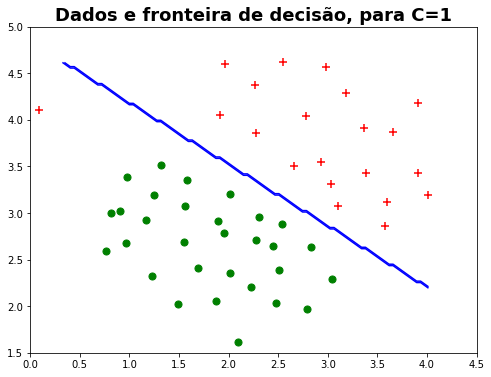

In [4]:
classifier = SVC(C=1, kernel="linear")
classifier.fit(X,np.ravel(y))
plt.figure(figsize=(8,6))
plt.scatter(X[pos[:,0],0],X[pos[:,0],1],c="r",marker="+",s=50)
plt.scatter(X[neg[:,0],0],X[neg[:,0],1],c="g",marker="o",s=50)
X_1,X_2 = np.meshgrid(np.linspace(X[:,0].min(),X[:,0].max(),num=100),np.linspace(X[:,1].min(),X[:,1].max(),num=100))
plt.contour(X_1,X_2,classifier.predict(np.array([X_1.ravel(),X_2.ravel()]).T).reshape(X_1.shape),1,colors="b")
plt.title("Dados e fronteira de decisão, para C=1", fontdict={'weight': 'bold', 'size':18})
plt.xlim(0,4.5)
plt.ylim(1.5,5)
plt.show()

### C = 50

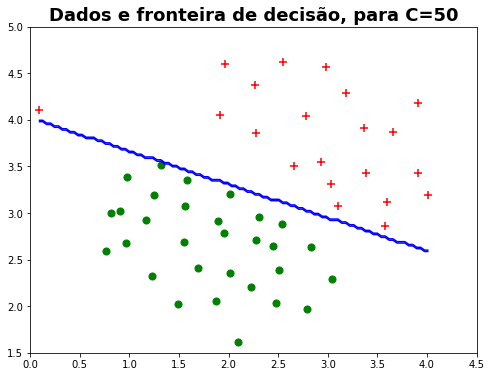

In [5]:
classifier = SVC(C=50, kernel="linear")
classifier.fit(X,np.ravel(y))
plt.figure(figsize=(8,6))
plt.scatter(X[pos[:,0],0],X[pos[:,0],1],c="r",marker="+",s=50)
plt.scatter(X[neg[:,0],0],X[neg[:,0],1],c="g",marker="o",s=50)
X_1,X_2 = np.meshgrid(np.linspace(X[:,0].min(),X[:,0].max(),num=100),np.linspace(X[:,1].min(),X[:,1].max(),num=100))
plt.contour(X_1,X_2,classifier.predict(np.array([X_1.ravel(),X_2.ravel()]).T).reshape(X_1.shape),1,colors="b")
plt.title("Dados e fronteira de decisão, para C=50", fontdict={'weight': 'bold', 'size':18})
plt.xlim(0,4.5)
plt.ylim(1.5,5)
plt.show()

### C = 100

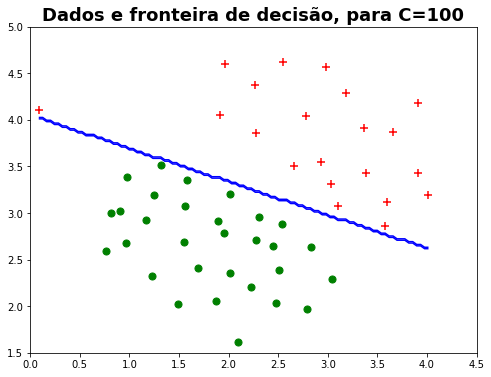

In [6]:
classifier = SVC(C=100, kernel="linear")
classifier.fit(X,np.ravel(y))
plt.figure(figsize=(8,6))
plt.scatter(X[pos[:,0],0],X[pos[:,0],1],c="r",marker="+",s=50)
plt.scatter(X[neg[:,0],0],X[neg[:,0],1],c="g",marker="o",s=50)
X_1,X_2 = np.meshgrid(np.linspace(X[:,0].min(),X[:,0].max(),num=100),np.linspace(X[:,1].min(),X[:,1].max(),num=100))
plt.contour(X_1,X_2,classifier.predict(np.array([X_1.ravel(),X_2.ravel()]).T).reshape(X_1.shape),1,colors="b")
plt.title("Dados e fronteira de decisão, para C=100", fontdict={'weight': 'bold', 'size':18})
plt.xlim(0,4.5)
plt.ylim(1.5,5)
plt.show()

## SVM - com Kernel Gaussiano

In [7]:
mat = loadmat("dado2.mat")
X = mat["X"]
y = mat["y"]
X_val = mat["Xval"]
y_val = mat["yval"]
# print(len(X))
# print(np.ravel(y), '\n')
# print(len(X_val))
# print(np.ravel(y_val))

211
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0] 

200
[0 1 0 0 0 0 0 1 1 1 1 1 0 0 1 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 1 1
 0 0 0 0 1 0 0 0 1 1 0 0 1 0 1 1 1 1 1 1 1 1 1 0 0 0 1 0 1 1 1 1 0 1 1 0 1
 0 1 0 0 0 1 0 0 0 1 0 0 1 1 0 0 0 1 0 1 1 0 1 1 0 0 1 1 0 1 1 1 1 1 1 0 1
 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 1 1 1 1 0 1 0 1 1 0 0 1 1 0 0 0 0 0 0 1 0
 0 1 0 1 1 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0 1 1 0 0 0 0 1 1 0 0 0 1 0 0 1 1 1
 0 0 1 0 1 0 0 1 1 1 1 0 0 0 0]


In [8]:
m,n = X.shape[0],X.shape[1]
pos,neg = (y==1).reshape(m,1),(y==0).reshape(m,1)

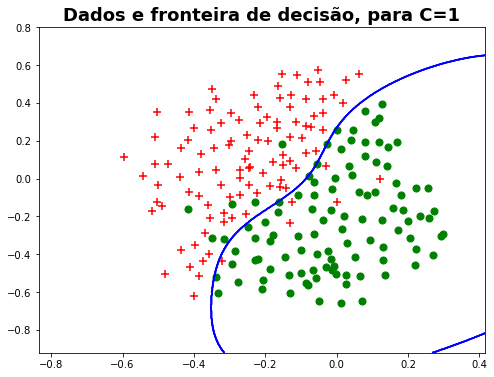

In [9]:
# Não consegui entender qual é o kernel Gaussiano; acho que é esse mesmo; pelo menos é uma função gaussiana
classifier = SVC(kernel="rbf")
classifier.fit(X,np.ravel(y))

plt.figure(figsize=(8,6))
plt.scatter(X[pos[:,0],0],X[pos[:,0],1],c="r",marker="+",s=50)
plt.scatter(X[neg[:,0],0],X[neg[:,0],1],c="g",marker="o",s=50)

sc_p = .4 # 0 < sc_p < 1; escala percentual; o quanto (percentual em relacao aos limites dos dados de treino) vc quer que o grafico aumente para plotar o contorno
X_1min = [X[:,0].min()*(1 - sc_p) if X[:,0].min() > 0 else X[:,0].min()*(1 + sc_p) for i in range(1)][0]
X_1max = [X[:,0].max()*(1 + sc_p) if X[:,0].max() > 0 else X[:,0].max()*(1 - sc_p) for i in range(1)][0]
X_2min = [X[:,1].min()*(1 - sc_p) if X[:,1].min() > 0 else X[:,1].min()*(1 + sc_p) for i in range(1)][0]
X_2max = [X[:,1].max()*(1 + sc_p) if X[:,1].max() > 0 else X[:,1].max()*(1 - sc_p) for i in range(1)][0]

X_1,X_2 = np.meshgrid(np.linspace(X_1min, X_1max,num=1000),np.linspace(X_2min,X_2max,num=1000))
plt.contour(X_1,X_2,classifier.predict(np.array([X_1.ravel(),X_2.ravel()]).T).reshape(X_1.shape),1,colors="b")

plt.contour(X_1,X_2,classifier.predict(np.array([X_1.ravel(),X_2.ravel()]).T).reshape(X_1.shape),1,colors="b")
plt.title("Dados e fronteira de decisão, para C=1", fontdict={'weight': 'bold', 'size':18})
#plt.xlim(0,4.5)
#plt.ylim(1.5,5)
#plt.grid()
plt.show()

In [10]:
m_val,n_val = X_val.shape[0],X_val.shape[1]
pos_val,neg_val = (y_val==1).reshape(m_val,1),(y_val==0).reshape(m_val,1)

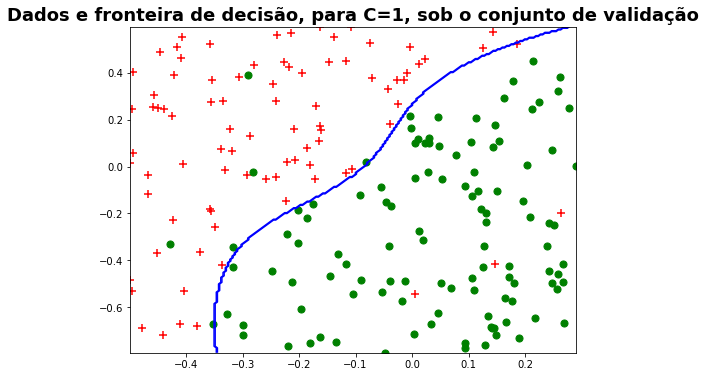

In [11]:
plt.figure(figsize=(8,6))
plt.scatter(X_val[pos_val[:,0],0],X_val[pos_val[:,0],1],c="r",marker="+",s=50)
plt.scatter(X_val[neg_val[:,0],0],X_val[neg_val[:,0],1],c="g",marker="o",s=50)

sc_p = .4 # 0 < sc_p < 1; escala percentual; o quanto (percentual em relacao aos limites dos dados de treino) vc quer que o grafico aumente para plotar o contorno
X_1min = [X[:,0].min()*(1 - sc_p) if X[:,0].min() > 0 else X[:,0].min()*(1 + sc_p) for i in range(1)][0]
X_1max = [X[:,0].max()*(1 + sc_p) if X[:,0].max() > 0 else X[:,0].max()*(1 - sc_p) for i in range(1)][0]
X_2min = [X[:,1].min()*(1 - sc_p) if X[:,1].min() > 0 else X[:,1].min()*(1 + sc_p) for i in range(1)][0]
X_2max = [X[:,1].max()*(1 + sc_p) if X[:,1].max() > 0 else X[:,1].max()*(1 - sc_p) for i in range(1)][0]

X_val_1,X_val_2 = np.meshgrid(np.linspace(X_val[:,0].min(),X_val[:,0].max(),num=200),np.linspace(X_val[:,1].min(),X_val[:,1].max(),num=200))
plt.contour(X_val_1,X_val_2,classifier.predict(np.array([X_val_1.ravel(),X_val_2.ravel()]).T).reshape(X_val_1.shape),1,colors="b")

#print(classifier.shape_fit_)

#plt.contour(X_val_1,X_val_2,classifier.predict(np.array([X_val_1.ravel(),X_val_2.ravel()]).T).reshape(X_val_1.shape),1,colors="b")
plt.title("Dados e fronteira de decisão, para C=1, sob o conjunto de validação", fontdict={'weight': 'bold', 'size':18})
#plt.xlim(0,4.5)
#plt.ylim(1.5,5)
#plt.grid()
plt.show()

## Determinando Hiperparâmetros

Vamos testar diferentes valores para a constante de regularização (C) e para a constante de escala da função gaussiana ($\sigma$): 

$$ K(\mathbf{x}, \mathbf{z}) = \exp\left({ -\dfrac{|| \mathbf{x} - \mathbf{z} ||}{2\sigma^2} } \right)$$

(https://en.wikipedia.org/wiki/Radial_basis_function_kernel)

### Uso do conjunto de validação para determinar C e $\sigma$ ótimos

In [12]:
# NORMALIZAR (SCALING)

n_p = int(2e2) # quantidade de cada parametro que sera testado
s_min = 1e-3
s_max = 3e6
s = np.logspace(np.log10(s_min), np.log10(s_max), n_p, base = 10) # s é o sigma
#s = np.linspace(s_min, s_max, n_p)

C_min = 1e-6
C_max = 3e6
C = np.logspace(np.log10(C_min), np.log10(C_max), n_p, base = 10) # C é o parametro de regularizacao
#C = np.linspace(C_min, C_max, n_p)

In [13]:
Hp = np.zeros( (n_p, n_p) ) # espaço dos HiperParametros; matriz guarda a performance de cada combinacao de HiperParametros
s_grid, C_grid = np.meshgrid(s, C)
cont = 0

s_otimo = -1 # se no final a resposta for -1 é pq deu errado
C_otimo = -1 # se no final a resposta for -1 é pq deu errado
taxa_otima = 0
for i, si in enumerate(s):
    for j, Ci in enumerate(C):
        gamma = (2*si)**(-1/2)
        classifier = SVC(kernel="rbf", C = Ci, gamma = gamma)
        classifier.fit(X,np.ravel(y))
        res = classifier.predict( X_val )
        taxa_acerto = (res == y_val.ravel()).sum() / len(y_val.ravel())
        #print( taxa_acerto )
        Hp[n_p-1 - i, j] = taxa_acerto
        
        if taxa_otima < taxa_acerto:
            s_otimo = si
            C_otimo = Ci
            taxa_otima = taxa_acerto
        
        cont += 1
        if cont % 1000 == 0:
            print(cont)

plt.imshow(Hp, cmap = 'magma')

KeyboardInterrupt: 

In [ ]:
plt.figure(figsize=(8,8))

x_labels = ['$10^{' + str(int(np.log10(si))) + '}$' for si in s]
y_labels = ['$10^{' + str(int(np.log10(Ci))) + '}$' for Ci in s]

fig, ax = plt.subplots()
ax.imshow(Hp**8, cmap = 'magma', extent=[s_min, s_max, C_min, C_max*10])
# put the major ticks at the middle of each cell
ax.set_xticks(np.arange(len(x_labels)) + 0, minor=False)
ax.set_yticks(np.arange(len(y_labels)) + 0, minor=False)

# want a more natural, table-like display
#ax.invert_yaxis()
#ax.xaxis.tick_top()

ax.set_xticklabels(x_labels, minor=False)
ax.set_yticklabels(y_labels, minor=False)


plt.savefig('com_tick_label_log.png')





plt.show()

In [ ]:
Hp.shape

In [ ]:

plt.imshow(Hp, cmap = 'magma', extent=[s_min, s_max, C_min, C_max] )
plt.xscale('log')
plt.yscale('log')
plt.show()

In [ ]:
import matplotlib
#plt.xscale('log')
#plt.yscale('log')
fig, ax = plt.subplots()
#ax.axis([s_min, s_max, C_min, C_max])
plt.imshow(Hp, extent=[s_min, s_max, C_min, C_max], cmap = 'magma')
ax.axis(np.log10(np.array([s_min, s_max, C_min, C_max])))
ax.loglog()
plt.show()

_____________________________________________________________________________

# Parte II - Análise de Componentes Principais

In [37]:
def feat_norm(X):
    
    mu = np.mean(X,axis=0)
    sigma = np.std(X,axis=0)
    
    X_norm = (X - mu)/sigma
    
    return X_norm,mu,sigma

In [56]:
def PCA(X):
    
    m, n = X.shape[0], X.shape[1]
    E = (1/m) * (X.T @ X)
    U, S, V = svd(E)
    
    return U,S,V

In [74]:
def reduced_feat(U, X):
    
    z = X @ U
    
    return z

In [107]:
def reconst_data(U, z):
    
    X_aprox = z @ U.T 
    
    return X_aprox

In [136]:
def proj_error(S, k):
    
    p_err = np.sum(S[:k])/np.sum(S)
    
    return p_err

In [175]:
mat = loadmat("dado3.mat")
X = mat["X"]
print(X.shape)

(5000, 1024)


## Imagens 

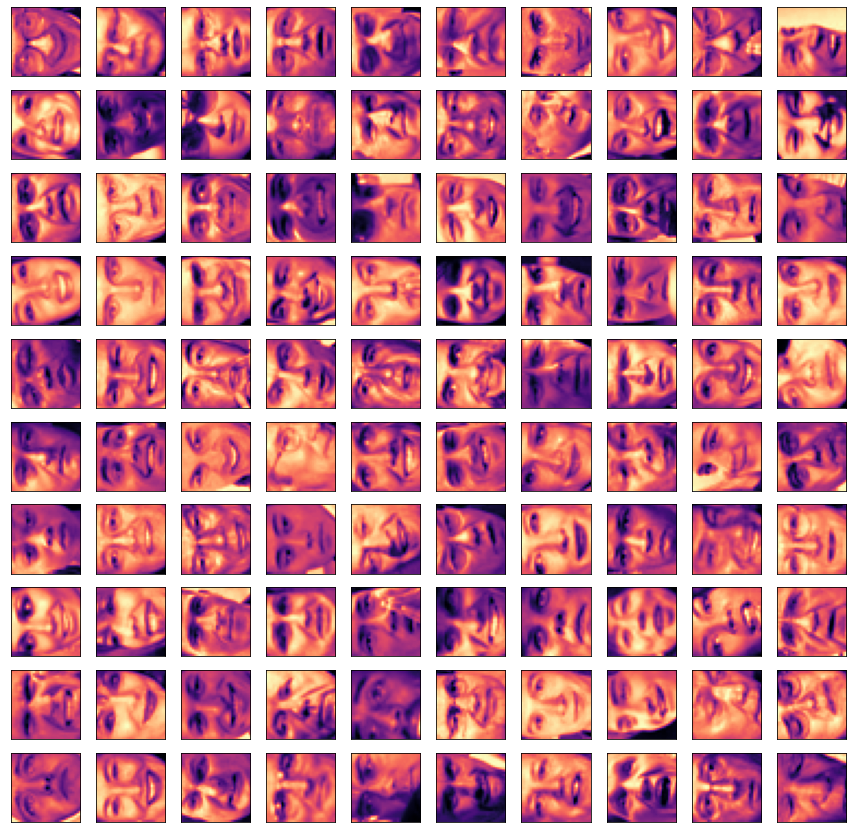

In [216]:
fig, axs = plt.subplots( 10, 10, figsize = (15, 15))  # para representar os autorrostos
X_2 = X[:100,:]
for (i, img_ativacao) in enumerate(X_2):
    im = axs[int(i/10)][i%10].imshow(img_ativacao.reshape(32, 32), cmap = 'magma')
    im.axes.get_xaxis().set_visible(False)
    im.axes.get_yaxis().set_visible(False)
plt.savefig("100_novos_rostos.png")
plt.show()

## PCA para 36 comp. principais e plot de suas eigenfaces

In [190]:
X_norm, mu, sigma = feat_norm(X)

U, S, V = PCA(X_norm)

k = 36

z = reduced_feat(U[:,:k], X_norm)

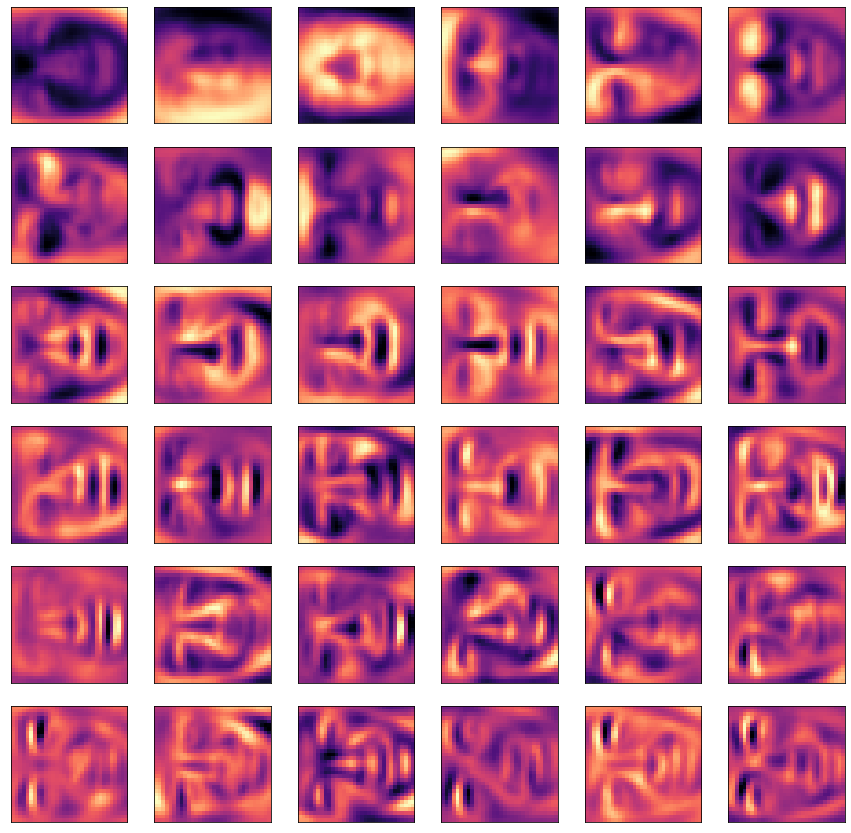

In [217]:
fig, axs = plt.subplots( 6, 6, figsize = (15, 15))  # para representar os autorrostos
U_reduced = U[:,:k].T
for (i, img_ativacao) in enumerate(U_reduced):
    im = axs[int(i/6)][i%6].imshow(img_ativacao.reshape(32, 32), cmap = 'magma')
    im.axes.get_xaxis().set_visible(False)
    im.axes.get_yaxis().set_visible(False)
plt.savefig("36auto_rostos.png")
plt.show()

## PCA para 100 comp. principais e reconstrução das imagens

In [179]:
X_norm, mu, sigma = feat_norm(X)

U, S, V = PCA(X_norm)

k = 100

z = reduced_feat(U[:,:k], X_norm)

In [180]:
new_X = reconst_data(U[:,:k], z)

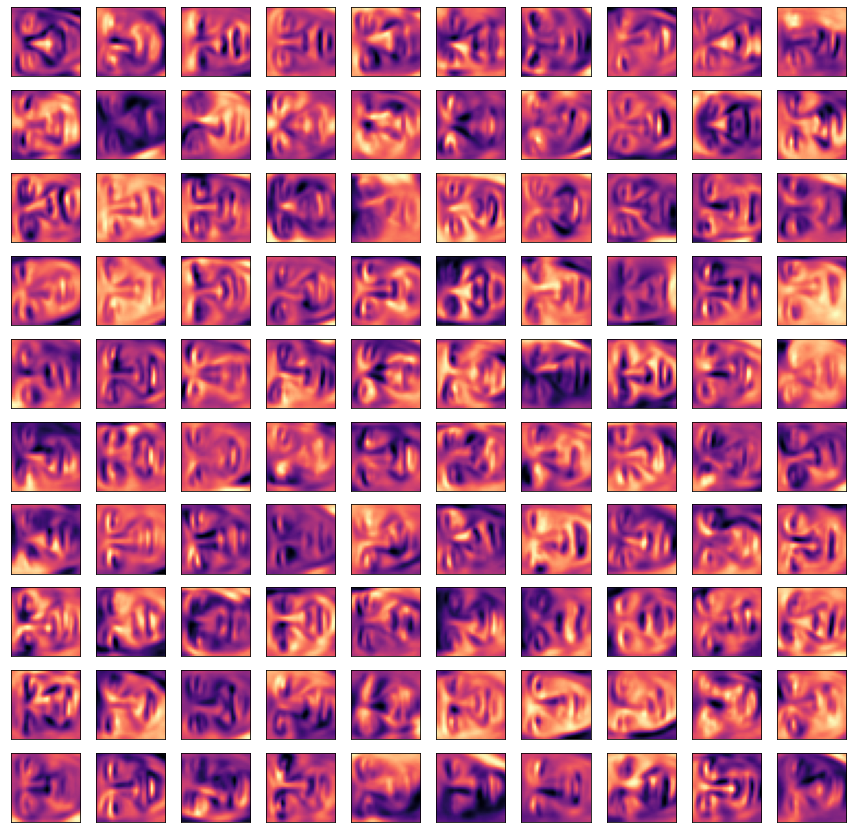

In [215]:
fig, axs = plt.subplots( 10, 10, figsize = (15, 15))  # para representar os autorrostos
new_X_2 = new_X[:100,:]
for (i, img_ativacao) in enumerate(new_X_2):
    im = axs[int(i/10)][i%10].imshow(img_ativacao.reshape(32, 32), cmap = 'magma')
    im.axes.get_xaxis().set_visible(False)
    im.axes.get_yaxis().set_visible(False)
plt.savefig("100_novos_rostos.png")
plt.show()

## Buscando o menor k com melhor resultado

In [218]:
X_norm, mu, sigma = feat_norm(X)
U, S, V = PCA(X_norm)

valor = []
m = X.shape[1]
for k in range(m):
    z = reduced_feat(U[:,:k], X_norm)
    valor.append(proj_error(S, k))

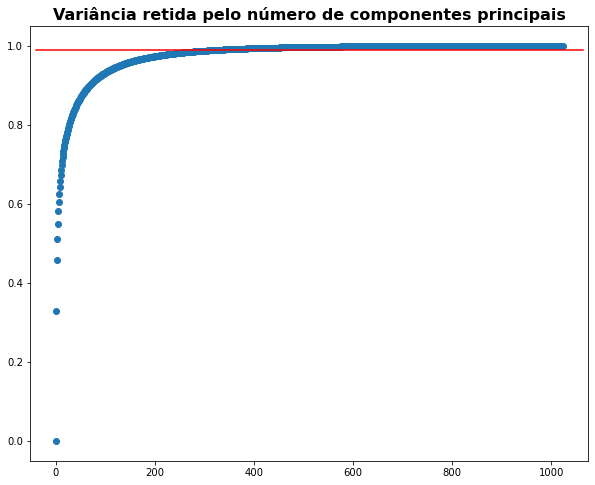

In [219]:
plt.figure(figsize=(10,8))
plt.scatter(range(m), valor)
plt.axhline(y=0.99, xmin=0.01, xmax=0.99,  c='r')
plt.title("Variância retida pelo número de componentes principais", fontdict={'weight':'bold', 'size':16})
plt.show()

In [220]:
i = 0
k_min = 0
while k_min < 0.99:
    k_min = valor[i]
    k_min_index = i
    i += 1

In [221]:
print(k_min, k_min_index)

0.9900422208219888 335
